# 单资产训练及下游预测任务

In [8]:
from ts2vec import TS2Vec
import datautils
import pandas as pd
import numpy as np


#### 读取UEA\UCR文件

In [2]:
# from scipy.io import arff
# def read_arrf(file):
#     with open(file, encoding='utf-8') as f:
#         header = []
#         for line in f :
#             if line.startswith('@attribute'):
#                 header.append(line.split()[1])
#             elif line.startswith('@data'):
#                 break
#         df = pd.read_csv(f, header=None)
#         df.columns = header
#     return df
# data= pd.DataFrame(arff.loadarff(r'D:\home\GitHub\ts2vec\datasets\UEA\Epilepsy\EpilepsyDimension3_TRAIN.arff')[0])
# raw = pd.read_csv(r'D:\home\GitHub\ts2vec\datasets\UCR\ArrowHead\ArrowHead_TRAIN.tsv',sep='\t')
# data  = pd.read_csv(f'datasets/single_stocks_dataset_ratio.csv', parse_dates=True, index_col='date')

#### 数据集加载

In [3]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols = datautils.load_forecast_csv('single_stocks_dataset_300203')

D:\home\work\seafile_root\王彦龙\我的资料库\私人资料库\GitHub\ts2vec\datautils.py:133: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dt.weekofyear.to_numpy(),


#### 模型加载

In [7]:
model = TS2Vec(
    input_dims=data.shape[2],
    device='cuda',
    output_dims=256,
    max_train_length=900,
    hidden_dims=64,
    depth=12,
    batch_size=60,
)

#### 模型训练

In [8]:
loss_log = model.fit(
    data[train_slice],
    n_epochs = 600,
    n_iters = 2000,
    verbose=True
)

loss: tensor(0.3602, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #200: loss=0.3602256178855896
loss: tensor(0.5577, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #201: loss=0.5577016472816467
loss: tensor(0.5543, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #202: loss=0.5542883276939392
loss: tensor(0.5520, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #203: loss=0.5519691109657288
loss: tensor(0.5433, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #204: loss=0.5433019995689392
loss: tensor(0.5479, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #205: loss=0.5478593707084656
loss: tensor(0.4442, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #206: loss=0.4441501796245575
loss: tensor(0.5947, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #207: loss=0.5947218537330627
loss: tensor(0.6284, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #208: loss=0.6283891797065735
loss: tensor(0.5146, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #209: loss=0.5145692825317383
loss: tensor(0.5409,

loss: tensor(0.2575, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #285: loss=0.2575462758541107
loss: tensor(0.2887, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #286: loss=0.28874751925468445
loss: tensor(0.3040, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #287: loss=0.3040262758731842
loss: tensor(0.2468, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #288: loss=0.24675285816192627
loss: tensor(0.2686, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #289: loss=0.26860034465789795
loss: tensor(0.3328, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #290: loss=0.332829087972641
loss: tensor(0.2176, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #291: loss=0.21760275959968567
loss: tensor(0.3289, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #292: loss=0.3288704454898834
loss: tensor(0.3135, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #293: loss=0.3135218918323517
loss: tensor(0.2557, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #294: loss=0.2556878626346588
loss: tensor(0.26

loss: tensor(0.3195, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #370: loss=0.31953755021095276
loss: tensor(0.3785, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #371: loss=0.3785105049610138
loss: tensor(0.2660, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #372: loss=0.2659507691860199
loss: tensor(0.2187, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #373: loss=0.2187013179063797
loss: tensor(0.2912, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #374: loss=0.291217178106308
loss: tensor(0.2863, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #375: loss=0.2863008677959442
loss: tensor(0.4076, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #376: loss=0.4075625240802765
loss: tensor(0.2248, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #377: loss=0.22479906678199768
loss: tensor(0.3253, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #378: loss=0.3252551555633545
loss: tensor(0.2601, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #379: loss=0.26007604598999023
loss: tensor(0.332

loss: tensor(0.0821, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #453: loss=0.08210042119026184
loss: tensor(0.0569, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #454: loss=0.05686578154563904
loss: tensor(0.1038, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #455: loss=0.10376548767089844
loss: tensor(0.0833, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #456: loss=0.08326848596334457
loss: tensor(0.2283, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #457: loss=0.22825950384140015
loss: tensor(0.0610, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #458: loss=0.06100152060389519
loss: tensor(0.1347, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #459: loss=0.1347118616104126
loss: tensor(0.0798, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #460: loss=0.07977154850959778
loss: tensor(0.1294, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #461: loss=0.12937521934509277
loss: tensor(0.0913, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #462: loss=0.09132545441389084
loss: tenso

loss: tensor(0.0717, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #537: loss=0.07168739289045334
loss: tensor(0.0542, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #538: loss=0.0541803240776062
loss: tensor(0.0689, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #539: loss=0.06889594346284866
loss: tensor(0.0651, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #540: loss=0.06513218581676483
loss: tensor(0.1295, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #541: loss=0.12948544323444366
loss: tensor(0.0387, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #542: loss=0.03868334740400314
loss: tensor(0.0446, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #543: loss=0.044627703726291656
loss: tensor(0.4802, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #544: loss=0.48015958070755005
loss: tensor(0.0456, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #545: loss=0.04564119502902031
loss: tensor(0.0573, device='cuda:0', grad_fn=<DivBackward0>)
Epoch #546: loss=0.05732331424951553
loss: tens

#### 打印损失图

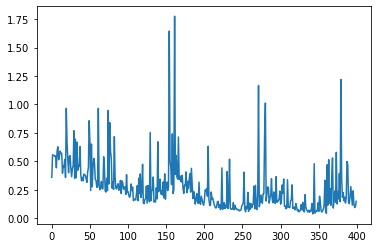

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_log)
plt.show()

#### 模型保存

In [12]:
model.save(r'examination/single_stocks_dataset_ratio_300203')